### Ficha de los datos 

In [ ]:
"""
Consideraciones del data set y el problema
-The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.
- Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
• Sex: male or female(Nominal)
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
• Current Smoker: whether or not the patient is a current smoker (Nominal)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)
"""

# diferencia entre presion sanguinea  distolic y systiole https://www.webmd.com/hypertension-high-blood-pressure/guide/diastolic-and-systolic-blood-pressure-know-your-numbers#1

### Pre-procesamiento de los datos 

In [1]:
# 
import pandas as pd
data= pd.read_csv("C:/Users/oscar/OneDrive/Escritorio/Machine-Learning-Python/Proyectos-Regresion_logistica/Heart-desiases/framingham_heart_disease.csv")

In [2]:
# datos que van se restructuran 
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# buscamos valores nulos en el dataset  
data.shape

(4238, 16)

In [4]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [5]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
# verificamos si hay valores nulos con la funcion isnull
pd.isnull(data["male"]) 

0       False
1       False
2       False
3       False
4       False
        ...  
4233    False
4234    False
4235    False
4236    False
4237    False
Name: male, Length: 4238, dtype: bool

In [7]:
variables = data.columns.values
variables

array(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype=object)

In [8]:
# con la funcion ravel lo hacemos vector, y con sum() sumamos los valores nulos, aqui intentamos hacer una funcion pero no jalo, arreglar despues
vector= []
for i in variables:
    v=pd.isnull(data[i]).ravel().sum()
    

In [9]:
v

0

In [10]:
# glucose tiene valores nulos, con las funciones ravel y sum 
pd.isnull(data["glucose"]).ravel().sum()

388

In [11]:
# tambien podemos usar esta funcion para hallar los valores nulos
len(data[pd.isnull(data.glucose)])

388

In [12]:
# como es un tipo de dato que nos dice los niveles de glucosa lo mejor seria rellenarlos con el promedio con la funcion fillna
data["glucose"]=data["glucose"].fillna(data["glucose"].mean()) 

In [13]:
# comprobamos que elos valores nulos del data set ahora son cero 
len(data[pd.isnull(data.glucose)])

0

In [14]:
# observamos la cantidad de datos nulos en educacion y como no tiene descripción y no es muy importante para el caso de estudio la eliminaremos 
pd.isnull(data["education"]).ravel().sum() 
data=data.drop(["education"],axis=1) 
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [15]:
# la variable cigsPerDay tambien presenta datos faltantes, por la naturaleza los remplazaremos con el promedio
data["cigsPerDay"]=data["cigsPerDay"].fillna(data["cigsPerDay"].mean())
pd.isnull(data["cigsPerDay"]).ravel().sum() #conprobamos que ya no haya valores faltantes

0

In [16]:
# como la varible BPmeds puede tener una gran significancia y solo son 53 observaciones eliminaremos los valores nulos del dataset
# eliminaremos las filas con valores faltantes de la columnas BPMeads #https://interactivechaos.com/es/python/scenario/eliminacion-de-filas-en-un-dataframe-pandas-partir-de-una-condicion
pd.isnull(data["BPMeds"]).ravel().sum()
df = data[data.BPMeds.isnull()] #este proceso se llma indexar para que con drop podamos eliminar solo los valores nulos de una fila
df.shape # aqui vermos el dataset con los valores nulos
df.index # optenemos el indice
data.drop(data[data.BPMeds.isnull()].index, inplace = True) # aqui ya usamos drop y elimonamos las filas con na de la columna BPmeds
data.shape # vemos la nueva cantidad de datos

(4185, 15)

In [17]:
# la variable toChol al ser los niveles de colesterol, continua remplazaremos los faltantes con la media
data["totChol"]= data["totChol"].fillna(data["totChol"].mean())
pd.isnull(data["totChol"]).ravel().sum()

0

In [18]:
# BMI de igual manera al ser el indice de masa corporal lo remplazamos por la media

data["BMI"]=data["BMI"].fillna(data["BMI"].mean()) 
pd.isnull(data["BMI"]).ravel().sum()

0

In [19]:
# Aqui usamos el metodo foward fill que es llenar la obs faltante con la inmediata anteriror 
data["heartRate"]= data["heartRate"].fillna(method= "ffill") 
pd.isnull(data["heartRate"]).ravel().sum()

#con este terminamos de quitar los valores nulos del dataset

0

### Analisis exploratorio de los datos 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
data.head()

# ANALISIS DE DATOS CUALITATIVOS
# https://relopezbriega.github.io/blog/2016/03/13/analisis-de-datos-cuantitativos-con-python/

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [22]:
# Iniciamos el analisis explorando la columna male par ver si puede afectar a las enfermedades cardiacas, pienso que la 0 es de hombres y 1 de mujeres
data["male"].value_counts() 

0    2381
1    1804
Name: male, dtype: int64

In [23]:
tabla_contingencia_sexo = pd.crosstab(data.male,data.TenYearCHD)
tabla_contingencia_sexo.astype("float").div(tabla_contingencia.sum(axis=1),axis=0) # para dividir las filas entre las columnas y sacar probabilidad

NameError: name 'tabla_contingencia' is not defined

Text(0.5, 1.0, 'Riesgo por sexo')

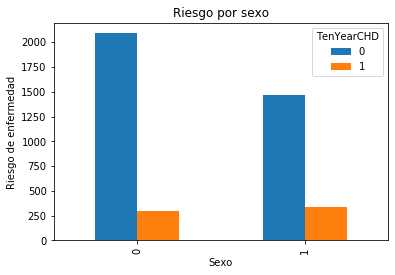

In [48]:
# Podemos hacer primeramente graficas cruzadas para ver quien se enferma más 
%matplotlib inline 
pd.crosstab(data.male,data.TenYearCHD).plot(kind="bar")
plt.xlabel("Sexo")
plt.ylabel("Riesgo de enfermedad")
plt.title("Riesgo por sexo")

# este pequeño analisis arroja que es más probable que siendo mujer adquiera una enfermedad cardiaca 

In [49]:
# Analisamos si el ser o no FUMADORES puede afectar y servir para el modelo 
tabla_con_smoke= pd.crosstab(data.currentSmoker,data.TenYearCHD)
tabla_con_smoke.astype("float").div(tabla_con_smoke.sum(axis=1),axis=0)

AttributeError: 'DataFrame' object has no attribute 'currentSmoker'

In [50]:
%matplotlib inline
pd.crosstab(data.currentSmoker,data.TenYearCHD).plot(kind="bar")
plt.xlabel("Fumador")
plt.ylabel("Riesgo")
# sorprendentemente no nos dice mucho si es oh  no fumador 

AttributeError: 'DataFrame' object has no attribute 'currentSmoker'

In [51]:
# analizamos ahora con la cantidad de cigarros al día 
%matplotlib inline 
pd.crosstab(data.cigsPerDay,data.TenYearCHD).plot(kind="bar") 

AttributeError: 'DataFrame' object has no attribute 'cigsPerDay'

In [52]:
plt.hist(data["cigsPerDay"])
plt.xlabel("cigarros por día")
plt.ylabel("Personas del estudio")

# analizando el histograma podemo concluir que el hecho de que fumen no representa un aumento significativo de enfermedades cardiacas

KeyError: 'cigsPerDay'

In [53]:
tabla=pd.crosstab(data.BPMeds, data.TenYearCHD)
tabla.astype(float).div(tabla.sum(axis=1),axis=0)

TenYearCHD,0,1
BPMeds,,
0.0,0.854223,0.145777
1.0,0.669355,0.330645


Text(0.5, 1.0, 'Riesgo de enfermedad con respecto a medicación ')

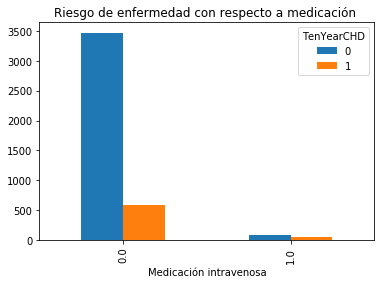

In [54]:
# analizamos ahora la variable bpmeds que es si el pacient tiene medicacion via intravenosa 
pd.crosstab(data.BPMeds, data.TenYearCHD).plot(kind="bar")
plt.xlabel("Medicación intravenosa")
plt.title("Riesgo de enfermedad con respecto a medicación ")

Text(0.5, 0, 'Medicacion intravenosa 0= no, 1=sí')

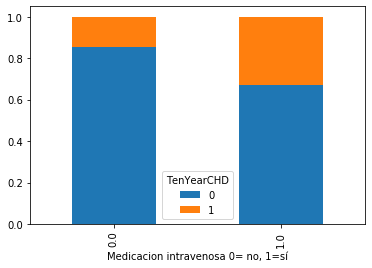

In [55]:
#graficamos haciendo proporcionales las barras para poder ver mejor si hay mas casos si tienes medicación intravenosa, al parecer sí

table1=pd.crosstab(data.BPMeds, data.TenYearCHD)
table1.div(table1.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Medicacion intravenosa 0= no, 1=sí") 

In [56]:
# ahora revisaremos prevalent stroke para ver si existio un para anteriro 
data["prevalentStroke"].hist()

# como o tenemos registros de que esta varible afecte a los ataques cardiacos la descartaremos 

KeyError: 'prevalentStroke'

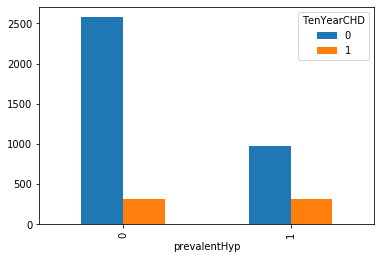

In [57]:
# prevalent hyp, si el paciente tiene hipertension 
pd.crosstab(data.prevalentHyp,data.TenYearCHD).plot(kind="bar")

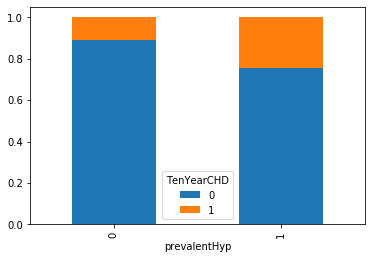

In [58]:
table3=pd.crosstab(data.prevalentHyp,data.TenYearCHD)
table3.div(table3.sum(axis=1).astype(float),axis=0).plot(kind="bar",stacked=True) 
# la hipertension definitivamente cuenta para las enfermedades del corazon

Text(0.5, 1.0, 'Enfermedades cardiovasculares con respecto a diabetes')

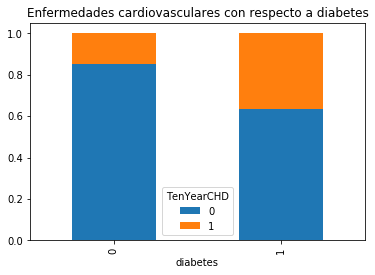

In [59]:
# ahora analizaremos diabetes 
table4=pd.crosstab(data.diabetes,data.TenYearCHD)
table4.div(table4.sum(1),axis=0).plot(kind="bar",stacked=True) 
plt.title("Enfermedades cardiovasculares con respecto a diabetes") 

# aqui tambien analizamos la diabetes y arroja resultado tambien positivo 

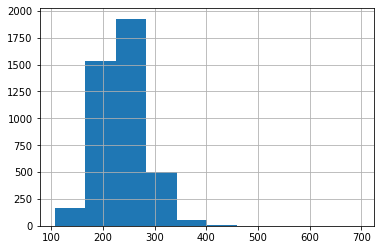

In [60]:
# corresponde el turno de colesterol(tot chol) y con este el de las variables continuas 
data["totChol"].hist() 

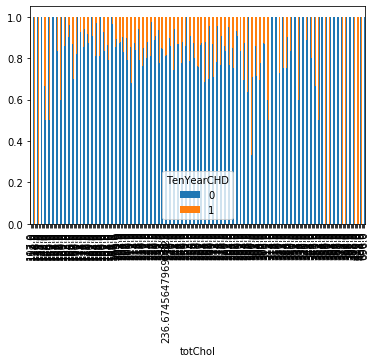

In [63]:
table= pd.crosstab(data.totChol,data.TenYearCHD)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

In [66]:
"""
Como la variable tochol es continua procedere a transformarla en una varible categorica que se dividira de la siguiente manera, si es mayor o no a 240 pues segun articulos esto se considera alto y 
puede traer concecuancias para la salud de y enfermedades cardivasculares 

https://medlineplus.gov/spanish/pruebas-de-laboratorio/niveles-de-colesterol/
"""
# usaremos la funcion tu cut para esto
categoria= pd.cut(data.totChol,bins=[0,240,696],labels=[0,1]) # cut es como lo cortara y label el valor que se le asgnaran
categoria
data.insert(6,"Colesterol",categoria) # 9 es la posicion de la nueva columna, despues el nombre y por ultimo la columna que agregaremos

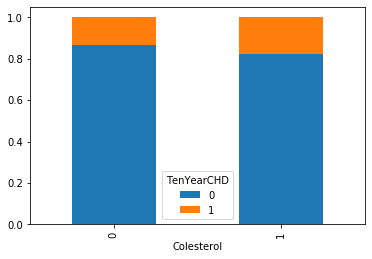

In [68]:
table= pd.crosstab(data.Colesterol,data.TenYearCHD)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

In [ ]:
table= pd.crosstab(data.Colesterol,data.TenYearCHD)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

In [61]:
data.head() #confirmamos la variable colesterol alto 

,male,age,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,IMC,heartRate,glucose,TenYearCHD
0,1,39,0.0,0,0,195.0,106.0,70.0,26.97,0,80.0,77.0,0
1,0,46,0.0,0,0,250.0,121.0,81.0,28.73,1,95.0,76.0,0
2,1,48,0.0,0,0,245.0,127.5,80.0,25.34,0,75.0,70.0,0
3,0,61,0.0,1,0,225.0,150.0,95.0,28.58,1,65.0,103.0,1
4,0,46,0.0,0,0,285.0,130.0,84.0,23.10,0,85.0,85.0,0


In [24]:
# ahora ya convertida miramremos como se ve la variable to-chol
table= pd.crosstab(data.Colesterol,data.TenYearCHD)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

AttributeError: 'DataFrame' object has no attribute 'Colesterol'

In [26]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


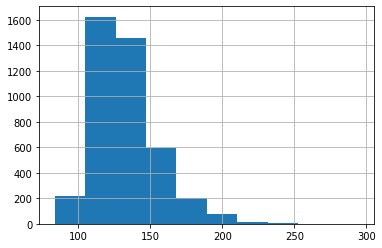

In [27]:
# Ahora analizaremos la varible Sys blood presurr
data["sysBP"].hist()

In [28]:
data["sysBP"].max()

295.0

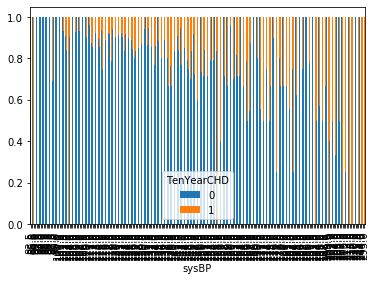

In [29]:
table= pd.crosstab(data.sysBP,data.TenYearCHD)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
 

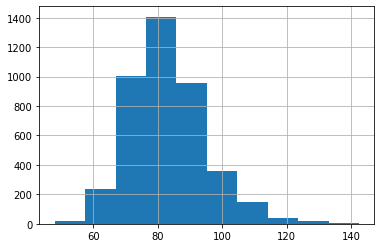

In [30]:
# Ahora analizaremos la varible dia blood presurr
data["diaBP"].hist()

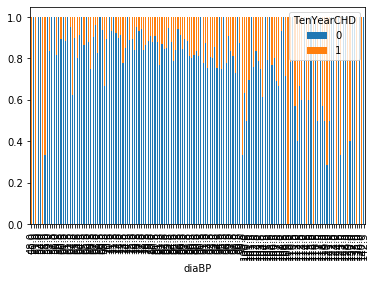

In [31]:
table= pd.crosstab(data.diaBP,data.TenYearCHD)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True) 

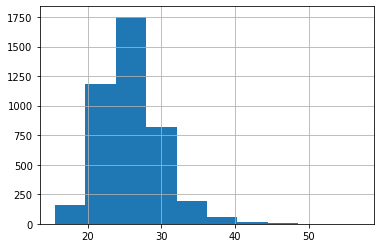

In [32]:
#  vemos ahora el indice de masa corporal 
data["BMI"].hist() 

In [33]:
#como el resultado tranformaremos tambien la varible colesterol para dividrilo pasarlo a uno con más riesgo 
data["BMI"].mean() # 25.84 
data["BMI"].max() # 56.8
categoria= pd.cut(data.BMI,bins=[0,27.5,56.8],labels=[0,1]) # cut es como lo cortara y label el valor que se le asgnaran
categoria
data.insert(12,"IMC",categoria)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,IMC,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,0,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,1,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,0,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,1,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,0,85.0,85.0,0


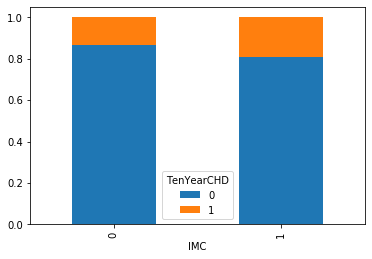

In [34]:
table=pd.crosstab(data.IMC,data.TenYearCHD)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True) 

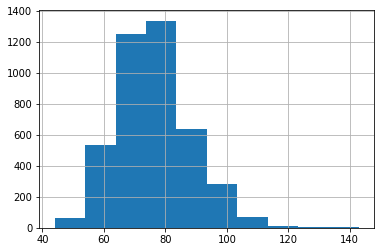

In [35]:
## vemos la relacion ahora con los latidos 
data["heartRate"].hist()  

# la variable no dice demasiado así que no se evaluara

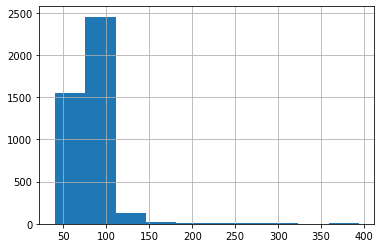

In [36]:
## vemos la relacion ahora con la glucosa  
data["glucose"].hist()

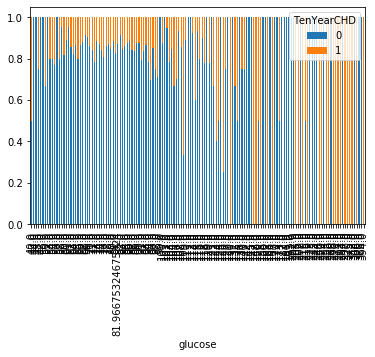

In [37]:
table=pd.crosstab(data.glucose,data.TenYearCHD)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True) 

### Correlaciones

In [38]:
data.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024650,0.196166,0.317041,-0.052506,-0.002208,0.006477,0.014906,-0.066437,-0.034198,0.058125,0.080630,-0.117012,0.006772,0.091758
age,-0.024650,1.000000,-0.211247,-0.189500,0.122995,0.054065,0.305296,0.102062,0.258079,0.393246,0.208288,0.134700,-0.012609,0.116333,0.223913
currentSmoker,0.196166,-0.211247,1.000000,0.766912,-0.048938,-0.030866,-0.100672,-0.042240,-0.045535,-0.126497,-0.104615,-0.168483,0.062496,-0.051852,0.021011
cigsPerDay,0.317041,-0.189500,0.766912,1.000000,-0.046128,-0.031266,-0.063292,-0.035500,-0.025406,-0.086229,-0.053772,-0.090202,0.073063,-0.053625,0.058879
BPMeds,-0.052506,0.122995,-0.048938,-0.046128,1.000000,0.117365,0.261187,0.052047,0.079593,0.254219,0.194227,0.100267,0.015266,0.049059,0.087489
prevalentStroke,-0.002208,0.054065,-0.030866,-0.031266,0.117365,1.000000,0.072436,0.007746,-0.003663,0.057222,0.051611,0.028903,-0.013384,0.009793,0.056258
prevalentHyp,0.006477,0.305296,-0.100672,-0.063292,0.261187,0.072436,1.000000,0.078338,0.160723,0.695816,0.617078,0.302769,0.147058,0.082724,0.176445
diabetes,0.014906,0.102062,-0.042240,-0.035500,0.052047,0.007746,0.078338,1.000000,0.043738,0.109452,0.051571,0.082805,0.050542,0.606836,0.096400
totChol,-0.066437,0.258079,-0.045535,-0.025406,0.079593,-0.003663,0.160723,0.043738,1.000000,0.208364,0.165527,0.119925,0.091530,0.044766,0.075912
sysBP,-0.034198,0.393246,-0.126497,-0.086229,0.254219,0.057222,0.695816,0.109452,0.208364,1.000000,0.784612,0.327756,0.180780,0.134541,0.216276


### Selección de variables del modelo 


In [39]:
data.head() 

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,IMC,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,0,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,1,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,0,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,1,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,0,85.0,85.0,0


In [72]:

#data=data.drop(["currentSmoker"],axis=1) # se elimino por poca significancia 
#data=data.drop(["cigsPerDay"],axis=1)
#data= data.drop(["prevalentStroke"],axis=1) 
data= data.drop(["totChol"],axis=1) 

In [88]:
# Ahora quitamos la variable TenYears pues es nuestra variable a predecir
data_vars= data.columns.values.tolist()
Y= ["TenYearCHD"]
X= [v for v in data_vars if v not in Y]
X
# X2= np.array(X).astype(np.float)

['male',
 'age',
 'BPMeds',
 'prevalentHyp',
 'diabetes',
 'Colesterol',
 'sysBP',
 'diaBP',
 'BMI',
 'IMC',
 'heartRate',
 'glucose']

In [89]:
data.head()

,male,age,BPMeds,prevalentHyp,diabetes,Colesterol,sysBP,diaBP,BMI,IMC,heartRate,glucose,TenYearCHD
0,1,39,0.0,0,0,0,106.0,70.0,26.97,0,80.0,77.0,0
1,0,46,0.0,0,0,1,121.0,81.0,28.73,1,95.0,76.0,0
2,1,48,0.0,0,0,1,127.5,80.0,25.34,0,75.0,70.0,0
3,0,61,0.0,1,0,0,150.0,95.0,28.58,1,65.0,103.0,1
4,0,46,0.0,0,0,1,130.0,84.0,23.10,0,85.0,85.0,0


In [90]:
# importamos paquetes necesarios 

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [91]:
lr= LogisticRegression() # cargamos el modelo a una variable

In [92]:
# se usaran 12 variables para el modelo 
n=12
rfe= RFE(lr,n) #Cargamos las regresion lineal  y el numero de variables

In [93]:
rfe= rfe.fit(data[X],data[Y].values.ravel()) # pasamos para el modelo las variables del vector X como independientes e Y como dependiente
# values.ravel es para hacer el vector Y tipo fila porque si no se pasa como vector columna

C:\Users\oscar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [94]:
print(rfe.support_) # imprimimos u a especie de vector con los resultados de que variables estaran en el modelo 

[ True  True  True  True  True  True  True  True  True  True  True  True]


In [99]:
print(rfe.ranking_)

[1 1 1 1 1 1 1 1 1 1 1 1]


In [95]:
# hacemos un zip para crizar los datos de las columnas con los de rfe.support
z=zip(data_vars,rfe.support_)
print(z) 

In [100]:
list(z)

[('male', True),
 ('age', True),
 ('BPMeds', True),
 ('prevalentHyp', True),
 ('diabetes', True),
 ('Colesterol', True),
 ('sysBP', True),
 ('diaBP', True),
 ('BMI', True),
 ('IMC', True),
 ('heartRate', True),
 ('glucose', True)]

In [101]:
cols=["male","age","BPMeds","prevalentHyp","diabetes","Colesterol","sysBP","diaBP","BMI","IMC","heartRate","glucose"]

In [112]:
# si esta linea no se corre da este error #TypeError: cannot perform reduce with flexible type quiza porque Y no esta bien cargado o porque se carga como un tipo distindto de dato
X=data[cols]
Y=data["TenYearCHD"]

### implementacion del modelo stats models

In [113]:
import statsmodels.api as sm

In [114]:
modelo_logistico= sm.Logit(Y,X)


In [115]:
result=modelo_logistico.fit() 

Optimization terminated successfully.
         Current function value: 0.395486
         Iterations 6


In [117]:
result.summary2() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.069     
Dependent Variable: TenYearCHD       AIC:              3334.2142 
Date:               2021-03-17 23:15 BIC:              3410.2854 
No. Observations:   4185             Log-Likelihood:   -1655.1   
Df Model:           11               LL-Null:          -1778.1   
Df Residuals:       4173             LLR p-value:      1.9003e-46
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
male           0.5612    0.0919   6.1091  0.0000   0.3812   0.7413
age            0.0303    0.0054   5.6413  0.0000   0.0198   0.0408
BPMeds         0.3588    0.2159   1.6620  0.0965  -0.0643   0.7819
prevalentHyp   0.7778    0.1170   6.6476  0.0000   0.5485   1.0071
diabetes       0.6640    0.2839   2.3388  0.0193   0.1075   1.2205
Colesterol     0.1566    0.0917   1.7078  0.0877  -0.0231   0.3363
sysBP          0.0137    0.0035   3.8717  0.0001   0.0068   0.0207
diaBP         -0.0239    0.0057  -4.1772  0.0000  -0.0351  -0.0127
BMI           -0.1206    0.0154  -7.8436  0.0000  -0.1507  -0.0905
IMC            0.9012    0.1320   6.8247  0.0000   0.6424   1.1600
heartRate     -0.0146    0.0036  -4.1056  0.0000  -0.0216  -0.0076
glucose        0.0021    0.0020   1.0009  0.3169  -0.0020   0.0061
=================================================================

"""

### implementacion del modelo con Sciki-learn

In [118]:
from sklearn import linear_model

In [119]:
logistic_model2=linear_model.LogisticRegression()

In [120]:
logistic_model2.fit(X,Y) 

C:\Users\oscar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
logistic_model2.score(X,Y)

0.8518518518518519

In [123]:
# creamos un data frame cruzando el zip de la columna x y las cruzamos con la prediccion
pd.DataFrame(list(zip(X.columns,np.transpose(logistic_model2.coef_)))) 

,0,1
0,male,[0.6331987849893007]
1,age,[0.04664688391678051]
2,BPMeds,[0.3073477633321401]
3,prevalentHyp,[0.4089551030676125]
4,diabetes,[0.29465097404227064]
5,Colesterol,[0.10975020478058524]
6,sysBP,[0.014537354291864125]
7,diaBP,[-0.010704405185873806]
8,BMI,[-0.048874409738064194]
9,IMC,[0.4133074794734461]


### Cros validation 

In [125]:
import numpy as np 
from sklearn.model_selection import train_test_split # esta linea de codigi es para inportar cross validation que no se puede con la nomenclaura pasada

In [127]:
# se crean las varibles X e Y para los datos train y test 
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3, random_state=0) # test_size es para crear una test del 30% y un tras del 70% de los datos

In [130]:
# vamos a relizar el modelo con scik learn  pero con las varibles de entrenamiento 
lm=linear_model.LogisticRegression()
lm.fit(X_train,Y_train) 

C:\Users\oscar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
# Asignamos en una variable las probabilidades que seran necesarias para el modelo
probabilidades=lm.predict_proba(X_test)

In [132]:
#CARGAMOS paquetes para la validación
from IPython.display import display, Math, Latex

In [134]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.05\end{cases}')) # como el programa clasifica las pro por defecto
probabilidades

# La primera columna es la probabilidad de que la predicción sea asertada y la segunda es de si esta propenso a tener enfer car o no como lo induca la acueción

<IPython.core.display.Math object>

array([[0.81600101, 0.18399899],
       [0.88622011, 0.11377989],
       [0.94855206, 0.05144794],
       ...,
       [0.79831542, 0.20168458],
       [0.94246212, 0.05753788],
       [0.85485567, 0.14514433]])

In [135]:
# sacamos la predicción 
predicción=lm.predict(X_test) 

In [136]:
probabilidades[:,1] 

array([0.18399899, 0.11377989, 0.05144794, ..., 0.20168458, 0.05753788,
       0.14514433])

In [137]:
# podemos ajustar el modelo menos estricto que 0.05, creamos un nuevo array de probabilidades 
props=probabilidades[:,1] # para obtener solo la segunda columna
prob_df=pd.DataFrame(props) 
treshold=0.1
prob_df["predicción"]=np.where(prob_df[0] > treshold,1,0)
# esta linea dice si la probabilidad en la columna cero es mayor a threshold se catagolara como propenso es decir 1 y si no sera ceros es decir no propenso

In [138]:
prob_df.head()

,0,predicción
0,0.183999,1
1,0.113780,1
2,0.051448,0
3,0.098421,0
4,0.202397,1


In [139]:
# calculamos cuantos caen como propensos, recurda que son los datos ya de predicción no de entrenamiento
pd.crosstab(prob_df.predicción,columns="counts")

col_0,counts
predicción,
0,472
1,784


In [146]:
# lo vemos en porcentaje 
784/len(prob_df) *100

62.42038216560509

In [149]:
# vamos ahora a verificar la eficacia del modelo 
from sklearn import metrics
metrics.accuracy_score(Y_test,predicción)

0.8495222929936306

In [150]:
# https://www.cienciadedatos.net/documentos/30_cross-validation_oneleaveout_bootstrap
"""
Existen varios tipos de clasificaciones pero ahora utilizaremos el K-fold-cross validation
"""
from sklearn.model_selection import cross_val_score
#scoring es la presicion de lo que necesitamos del modelo, cv es el numero de k que se dividira el modelo

In [152]:
scores= cross_val_score(linear_model.LogisticRegression(),X,Y, scoring="accuracy",cv=10)

C:\Users\oscar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\oscar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\oscar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\oscar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\oscar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [154]:
# aqui ya hacemos predicciones con nuestros datos de entrenamiento 
scores

array([0.85      , 0.85714286, 0.84725537, 0.8492823 , 0.8492823 ,
       0.84688995, 0.85645933, 0.8492823 , 0.85167464, 0.85406699])

In [155]:
scores.mean() # el promedio de predicción de el modelo 

0.851133602611432

### Matrices de confusion y curvas ROC 

In [157]:
# observamos el data frame con las predicciones 
prob_df

,0,predicción
0,0.183999,1
1,0.113780,1
2,0.051448,0
3,0.098421,0
4,0.202397,1
...,...,...
1251,0.070380,0
1252,0.166325,1
1253,0.201685,1
1254,0.057538,0


In [163]:
# le agregaremos un columna que seran los casos reales 
prob_df["Real"]=list(Y_test) 
prob_df 

,0,predicción,Real
0,0.183999,1,0
1,0.113780,1,0
2,0.051448,0,0
3,0.098421,0,0
4,0.202397,1,0
...,...,...,...
1251,0.070380,0,0
1252,0.166325,1,0
1253,0.201685,1,0
1254,0.057538,0,0


In [176]:
#optenemos la matriz de confusion 
mc=pd.crosstab(prob_df.predicción,prob_df.Real)
mc

Real,0,1
predicción,,
0,439,33
1,626,158


In [177]:
# Sacamos el verdadero positivo
TP=mc[1][1]
TP

158

In [178]:
# verdadero negativo
TN=mc[0][0] 
TN

439

In [186]:
# falso negativo
FP=mc[1][0]
FP

33

In [188]:
# falso negativo
FN=mc[0][1]
FN

626

In [192]:
"""
optemenmos las metricas de la matriz de confusion iniciando con la exactitud o accuracy que es la proporcion 
de predicciones de enfermedad que elmodelo calsifico correctamente 
"""
Acuurracy= (TP+TN)/(TP+TN+FP+FN)
Acuurracy *100

47.53184713375796

In [195]:
# La precisión también se conoce como valor predictivo positivo y es la proporción de instancias relevantes entre las instancias recuperadas. En otras palabras, responde a la pregunta "¿Qué proporción de identificaciones positivas fue realmente correcta?"
Presición=TP/(TP+FP)
Presición*100

82.72251308900523

In [201]:
# sensibilidad VP/(VP+FN),  Es la proporción de casos positivos que fueron correctamente identificadas por el algoritmo. 
sensibilidad= TP/(TP+FN) 
sensibilidad

0.20153061224489796

In [199]:
# Especificidad También conocida como la Tasa de Verdaderos Negativos, (“true negative rate”) o TN. Se trata de los casos negativos que el algoritmo ha clasificado correctamente.  Expresa cuan bien puede el modelo detectar esa clase. 
recall= TN/(TN+FP)
recall*100

# IDENTIFICAMOS los sanos entre los sanos

93.00847457627118